In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-10-21 18:52:33.028005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### CSV 파일 불러오기

In [361]:
df = pd.read_csv("datas/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


# 머신러닝 분류

### 데이터 전처리

In [362]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Label')

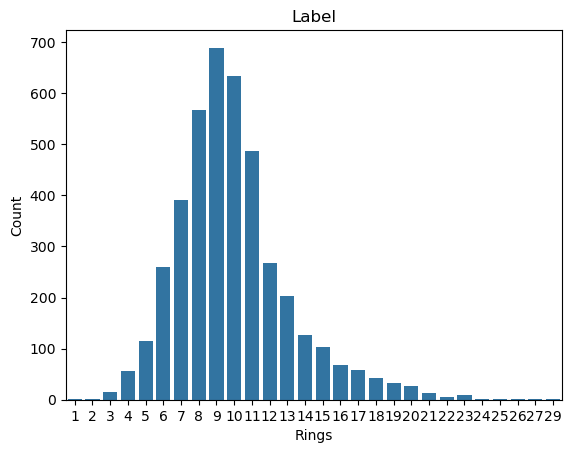

In [363]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Label")

In [364]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [365]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [366]:
total_count = len(df)
q1_count = total_count * 0.33
q2_count = total_count * 0.66

cumulative = df['Rings'].value_counts().sort_index().cumsum()
q1_rings = cumulative[cumulative >= q1_count].index[0]
q2_rings = cumulative[cumulative >= q2_count].index[0]
print(q1_rings, q2_rings)

8 11


In [367]:
bins = [0, q1_rings, q2_rings, 30]
df['Rings'] = pd.cut(df['Rings'], bins=bins, right=True).cat.codes
df['Rings']

id
0       2
1       0
2       1
3       1
4       0
       ..
4172    1
4173    1
4174    1
4175    1
4176    2
Name: Rings, Length: 4177, dtype: int8

In [368]:
df['Rings'].value_counts().sort_index()

Rings
0    1407
1    1810
2     960
Name: count, dtype: int64

In [369]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [370]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1,False,False,True


In [371]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  Length  Diameter    Height  Whole_weight  Shucked_weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole_weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked_weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera_weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell_weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.549238  0.566534  0.542407      0.545434        0.445484   
Sex_F           0.309666  0.318626  0.298421      0.299741        0.263991   
Sex_I          -0.551465 -0.564315 -0.518552     -0.557592       -0.521842   
Sex_M           0.236543  0.240376  0.215459      0.252038        0.251793   

                Viscera_weight  Shell_weight     Rings     Sex_

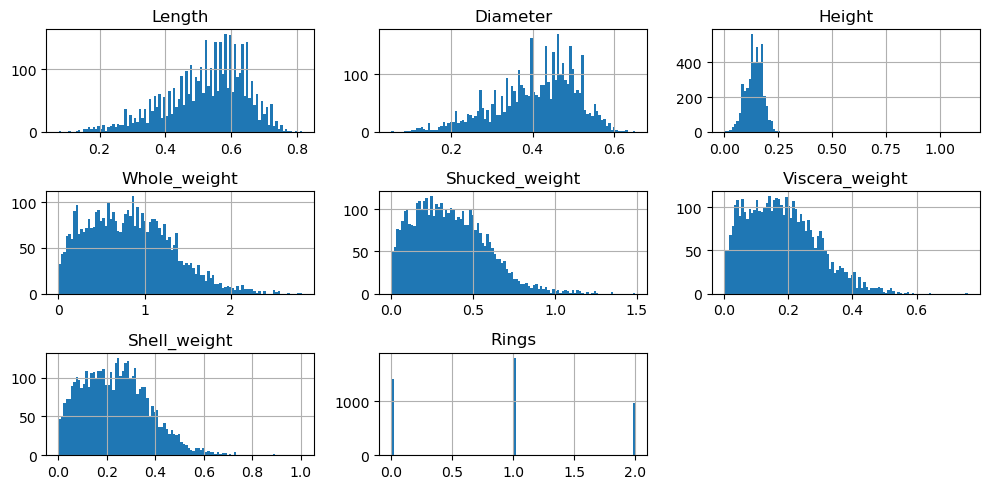

In [372]:
df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

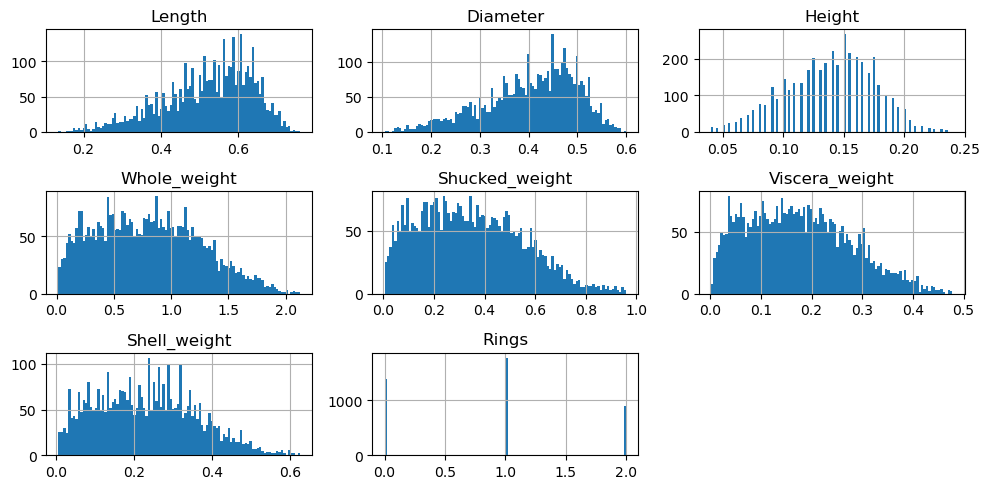

In [373]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

columns_to_check = ['Height', 'Shell_weight', 'Shucked_weight', 'Viscera_weight', 'Whole_weight']
df = remove_outliers(df, columns_to_check)

df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

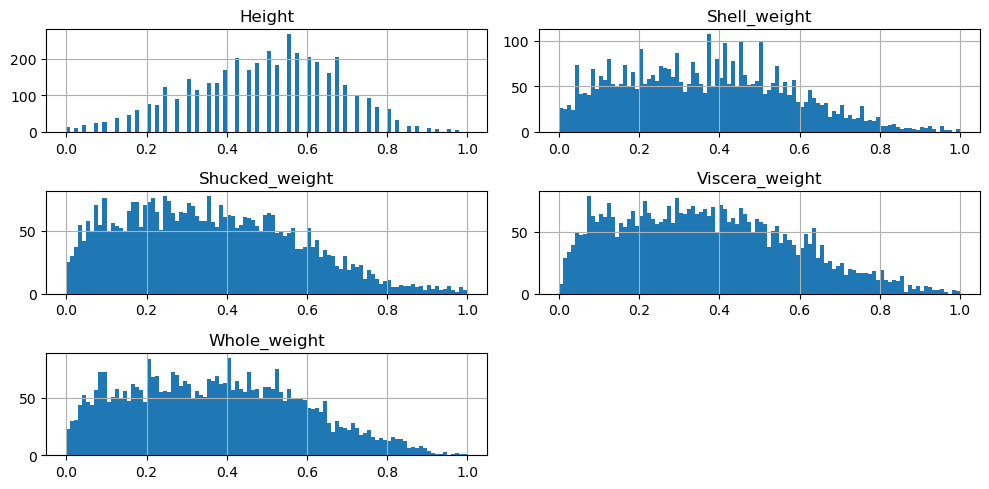

In [374]:
from sklearn.preprocessing import MinMaxScaler

X = df[columns_to_check]
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

In [375]:
from sklearn.preprocessing import MinMaxScaler
y = df['Rings']    
y

id
0       2
1       0
2       1
3       1
4       0
       ..
4172    1
4173    1
4174    1
4175    1
4176    2
Name: Rings, Length: 4056, dtype: int8

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### SVM 분류

In [378]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))


--- SVM Classifier ---
0.6814595660749507


### LR 분류

In [379]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6755424063116371


### KNN 분류

In [380]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)
print("\n--- KNN Classifier ---")
print(accuracy_score(y_test, pred_knn))


--- KNN Classifier ---
0.6538461538461539


### DT 분류

In [381]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
pred_dt = clf_dt.predict(X_test)
print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))


--- Decision Tree Classifier ---
0.5956607495069034


### RF 분류

In [382]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))


--- Radom Forest ---
0.6715976331360947


## 딥러닝 분류

In [383]:
y=df['Rings']
y.value_counts().sort_index()

Rings
0    1383
1    1773
2     900
Name: count, dtype: int64

In [384]:
y=df['Rings']
Y = pd.get_dummies(y).values
Y

array([[False, False,  True],
       [ True, False, False],
       [False,  True, False],
       ...,
       [False,  True, False],
       [False,  True, False],
       [False, False,  True]])

In [390]:
X = df[columns_to_check]
X = X.values
X

array([[0.095 , 0.15  , 0.2245, 0.101 , 0.514 ],
       [0.09  , 0.07  , 0.0995, 0.0485, 0.2255],
       [0.135 , 0.21  , 0.2565, 0.1415, 0.677 ],
       ...,
       [0.205 , 0.308 , 0.5255, 0.2875, 1.176 ],
       [0.15  , 0.296 , 0.531 , 0.261 , 1.0945],
       [0.195 , 0.495 , 0.9455, 0.3765, 1.9485]])

In [391]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [394]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# 다중 클래스: softmax + categorical_crossentropy
# 이진 클래스: sigmoid + binary_crossentropy
model = Sequential()
model.add(Dense(10,input_shape=(5,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))
model.compile(Adam(learning_rate=0.0001),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                60        
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 6)                 54        
                                                                 
 dense_15 (Dense)            (None, 3)                 21        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [399]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=30, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
109/109 [==============================] - 0s 2ms/step - loss: 0.9485 - accuracy: 0.5832 - val_loss: 0.9487 - val_accuracy: 0.5751
Epoch 2/20
109/109 [==============================] - 0s 2ms/step - loss: 0.9332 - accuracy: 0.5946 - val_loss: 0.9339 - val_accuracy: 0.5874
Epoch 3/20
109/109 [==============================] - 0s 3ms/step - loss: 0.9184 - accuracy: 0.5968 - val_loss: 0.9203 - val_accuracy: 0.5837
Epoch 4/20
109/109 [==============================] - 0s 2ms/step - loss: 0.9048 - accuracy: 0.5993 - val_loss: 0.9078 - val_accuracy: 0.5973
Epoch 5/20
109/109 [==============================] - 0s 1ms/step - loss: 0.8926 - accuracy: 0.6017 - val_loss: 0.8973 - val_accuracy: 0.5985
Epoch 6/20
109/109 [==============================] - 0s 1ms/step - loss: 0.8822 - accuracy: 0.6020 - val_loss: 0.8885 - val_accuracy: 0.5985
Epoch 7/20
109/109 [==============================] - 0s 1ms/step - loss: 0.8731 - accuracy: 0.6030 - val_loss: 0.8807 - val_accuracy: 0.6010
Epoch 

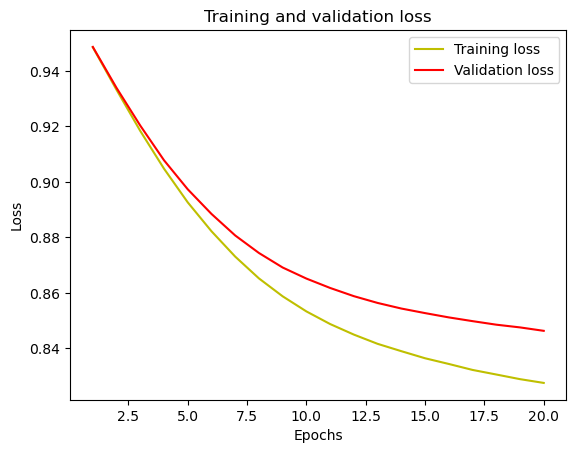

In [400]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

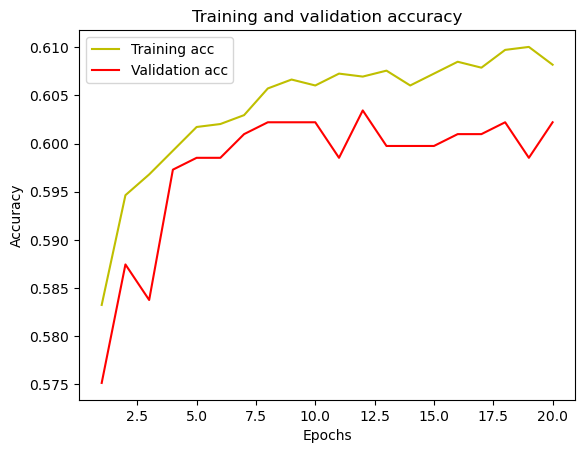

In [401]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [402]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       278
           1       0.55      0.80      0.65       346
           2       0.67      0.01      0.02       188

    accuracy                           0.60       812
   macro avg       0.64      0.52      0.46       812
weighted avg       0.63      0.60      0.53       812

[[209  69   0]
 [ 67 278   1]
 [ 25 161   2]]


## 머신러닝 회귀

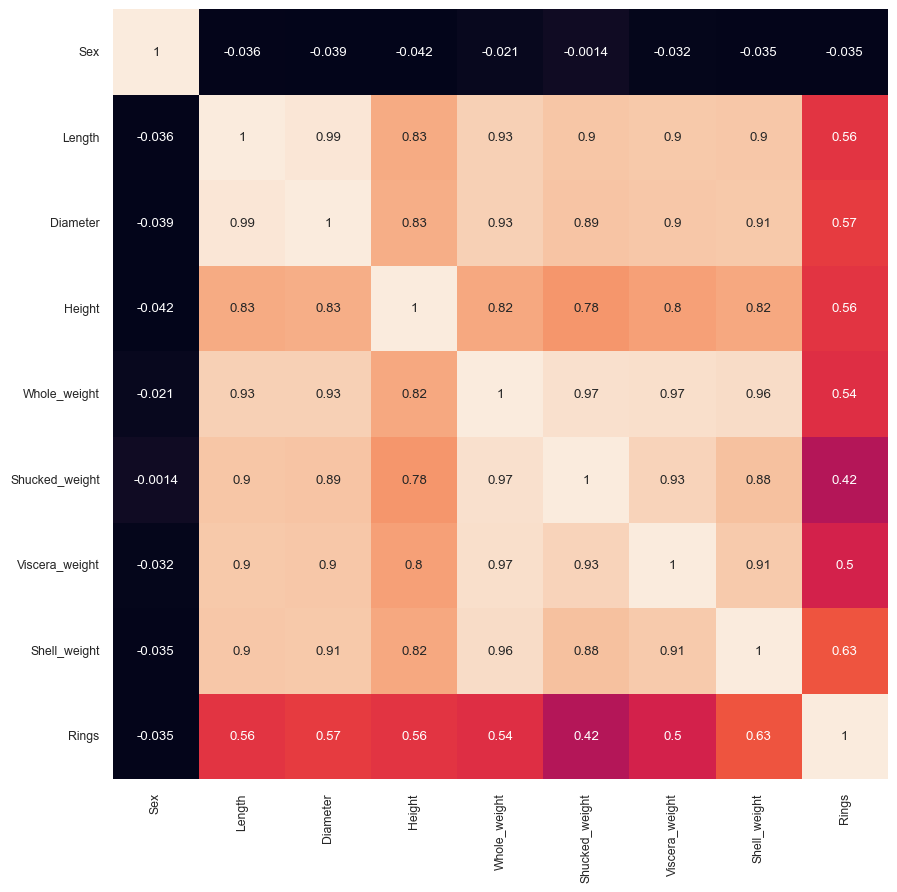

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [122]:
X = df.drop(['Rings'], axis=1)
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [123]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

### Linear 회귀

In [124]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error
    
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse_np(ly_preds, y_test))
print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 5.13574530482317
평균제곱근오차 5.13574530482317
평균제곱근오차 5.13574530482317


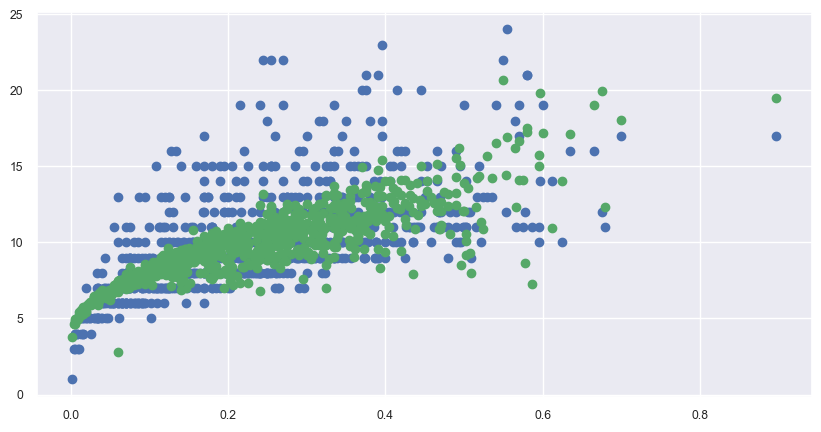

In [126]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='g', label='ly_preds')
plt.show()   

### Decision Tree 회귀

In [127]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 8.449101796407186


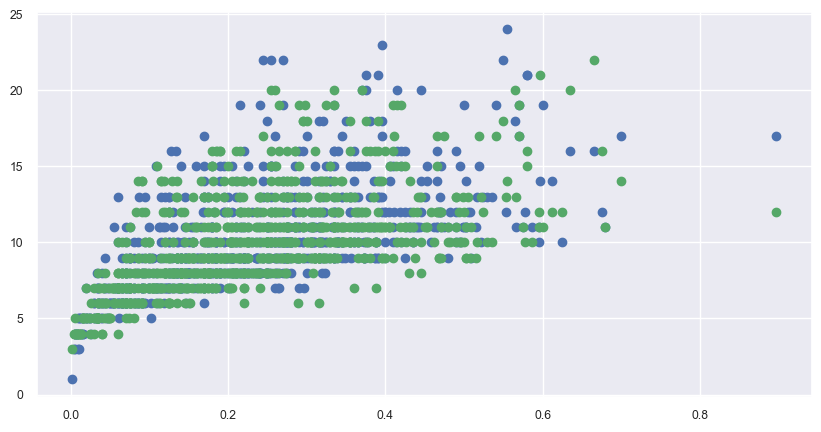

In [128]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()   

### Random Forest 회귀

In [129]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.009458922155688


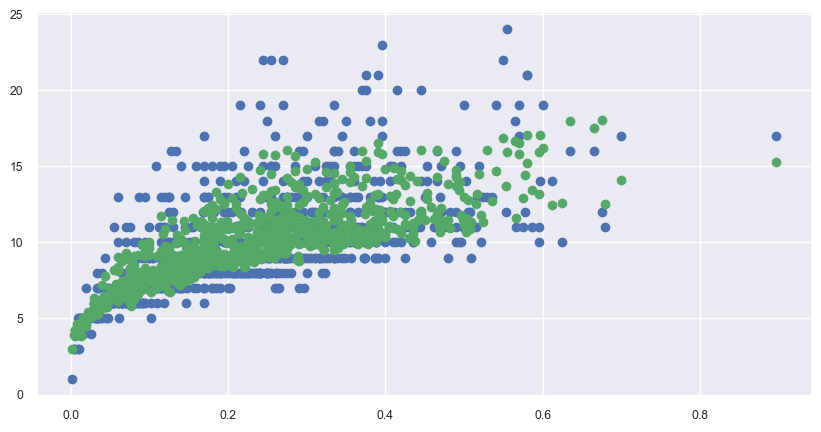

In [130]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='g', label='ry_preds')
plt.show()  

### SVR 회귀

In [131]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.79241921570007


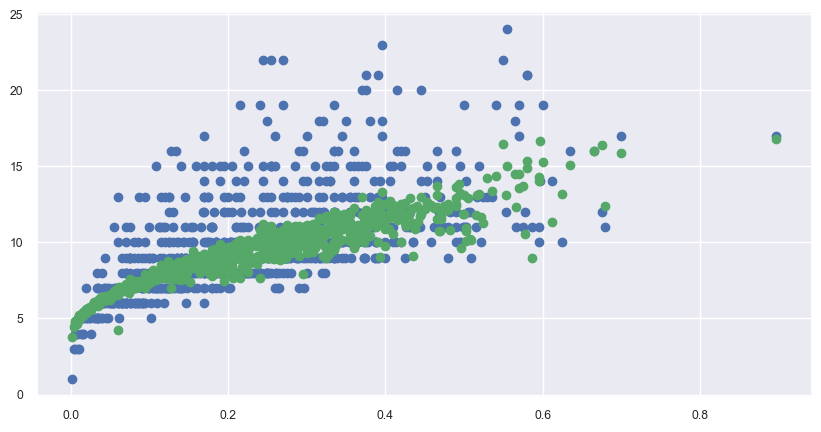

In [132]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='g', label='ly_preds')
plt.show()  

## 딥러닝 회귀

In [133]:
y = df['Rings']
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [134]:
X = df.drop(['Rings'], axis=1)
X = X.values
X

array([[ 1.    ,  0.455 ,  0.365 , ...,  0.2245,  0.101 ,  0.15  ],
       [ 1.    ,  0.35  ,  0.265 , ...,  0.0995,  0.0485,  0.07  ],
       [-1.    ,  0.53  ,  0.42  , ...,  0.2565,  0.1415,  0.21  ],
       ...,
       [ 1.    ,  0.6   ,  0.475 , ...,  0.5255,  0.2875,  0.308 ],
       [-1.    ,  0.625 ,  0.485 , ...,  0.531 ,  0.261 ,  0.296 ],
       [ 1.    ,  0.71  ,  0.555 , ...,  0.9455,  0.3765,  0.495 ]])

In [135]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                90        
                                                                 
 dense_41 (Dense)            (None, 30)                330       
                                                                 
 dense_42 (Dense)            (None, 30)                930       
                                                                 
 dense_43 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


In [147]:
N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
105/105 [==============================] - 0s 1ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 2/20
105/105 [==============================] - 0s 838us/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 3/20
105/105 [==============================] - 0s 819us/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 4/20
105/105 [==============================] - 0s 818us/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 5/20
105/105 [==============================] - 0s 805us/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/20
105/105 [==============================] - 0s 811us/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 7/20
105/105 [==============================] - 0s 832us/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 8/20
105/105 [==============================] - 0s 833us/s

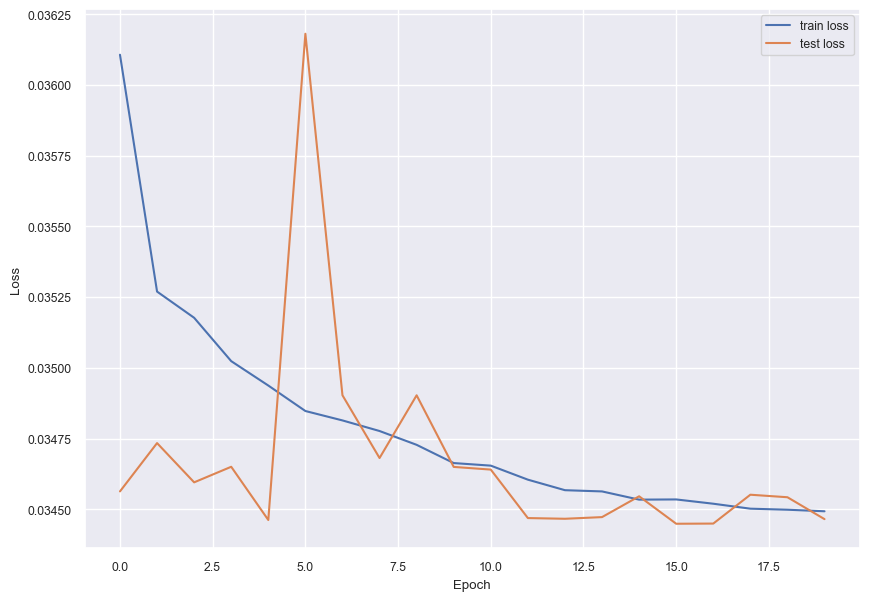

In [148]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [149]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 583us/step - loss: 0.0345 - mse: 0.0345


[0.03446536511182785, 0.03446536511182785]